# Imports

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

# Dados

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
# Imprimindo o nome das variáveis
print("Features: ", cancer.feature_names)

# Imprimindo os tipos de cancer - target
print("Labels: ", cancer.target_names)

NameError: name 'cancer' is not defined

In [4]:
# dimensões do dataset
cancer.data.shape

(569, 30)

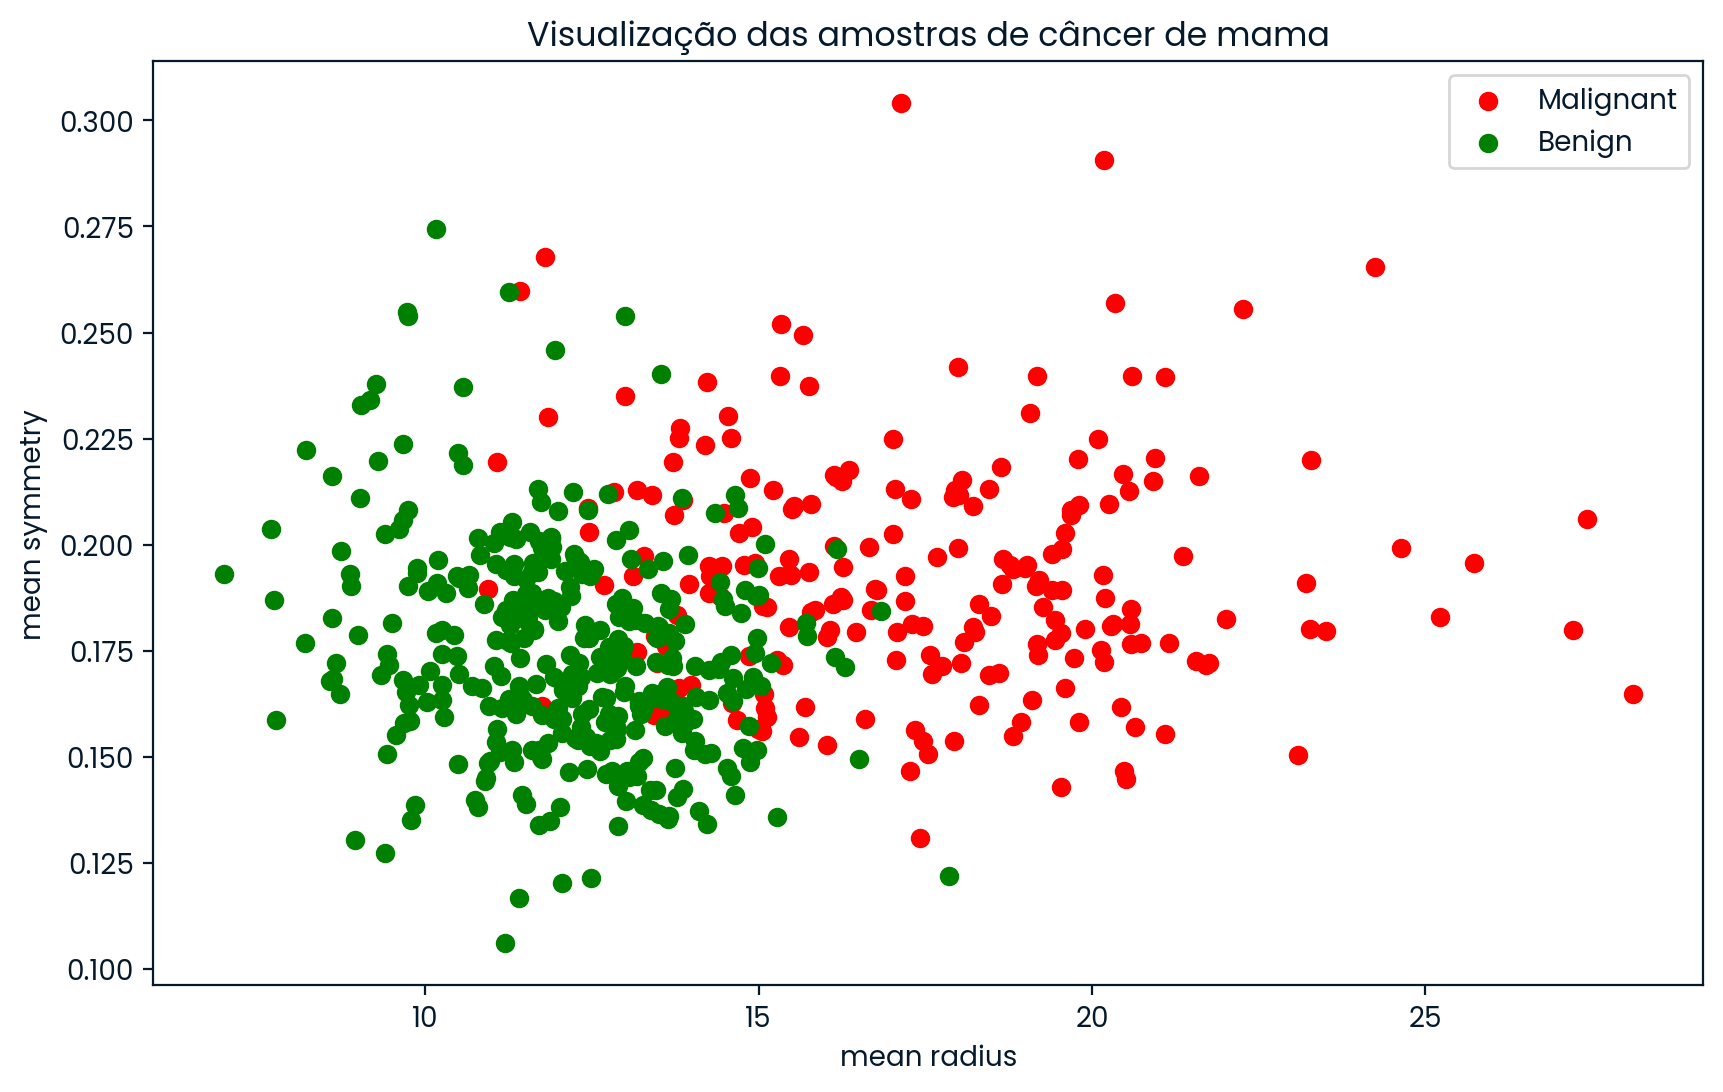

In [13]:
# Visualizando os dados
X = cancer.data
y = cancer.target

# Escolher as variáveis
x_index = 0  # mean radius
y_index = 8  # mean texture

# Criar o scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, x_index], X[y == 0, y_index], color='red', label='Malignant')
plt.scatter(X[y == 1, x_index], X[y == 1, y_index], color='green', label='Benign')
plt.xlabel(cancer.feature_names[x_index])
plt.ylabel(cancer.feature_names[y_index])
plt.title('Visualização das amostras de câncer de mama')
plt.legend()
plt.show()

In [11]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) 

# Modelo

In [14]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Avaliando o modelo

In [20]:
# Métricas de avaliação do modelo
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))

Acurácia: 0.9649122807017544
Precisão: 0.9811320754716981
Recall: 0.9629629629629629
F1 Score: 0.9719626168224299
AUC: 0.9656084656084655


# Aula prática - parte 2

Nessa aula, vamos variar alguns hiperparâmetros do SVM e verificar a performance dos modelos criados. 

## Imports

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Carregar os dados de câncer
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Padronizar os dados (SVM é sensível à escala das features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Testando diferentes kernels: 'rbf', 'poly', 'linear'

In [22]:
# Inicializar o modelo SVM com os hiperparâmetros escolhidos
modelo1 = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
modelo2 = SVC(kernel='poly', C=10, gamma='scale', probability=True)
modelo3 = SVC(kernel='linear', C=10, gamma='scale', probability=True)

# Treinar o modelo
modelo1.fit(X_train, y_train)
modelo2.fit(X_train, y_train)
modelo3.fit(X_train, y_train)

# Fazer previsões
y_pred1 = modelo1.predict(X_test)
y_pred2 = modelo2.predict(X_test)
y_pred3 = modelo3.predict(X_test)

In [23]:
# Avaliar os modelos
from sklearn.metrics import roc_curve, auc

y_prob1 = modelo1.predict_proba(X_test)[:, 1]
y_prob2 = modelo2.predict_proba(X_test)[:, 1]
y_prob3 = modelo3.predict_proba(X_test)[:, 1]

# Calculando os valores da curva ROC
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_prob3)
roc_auc3 = auc(fpr3, tpr3)

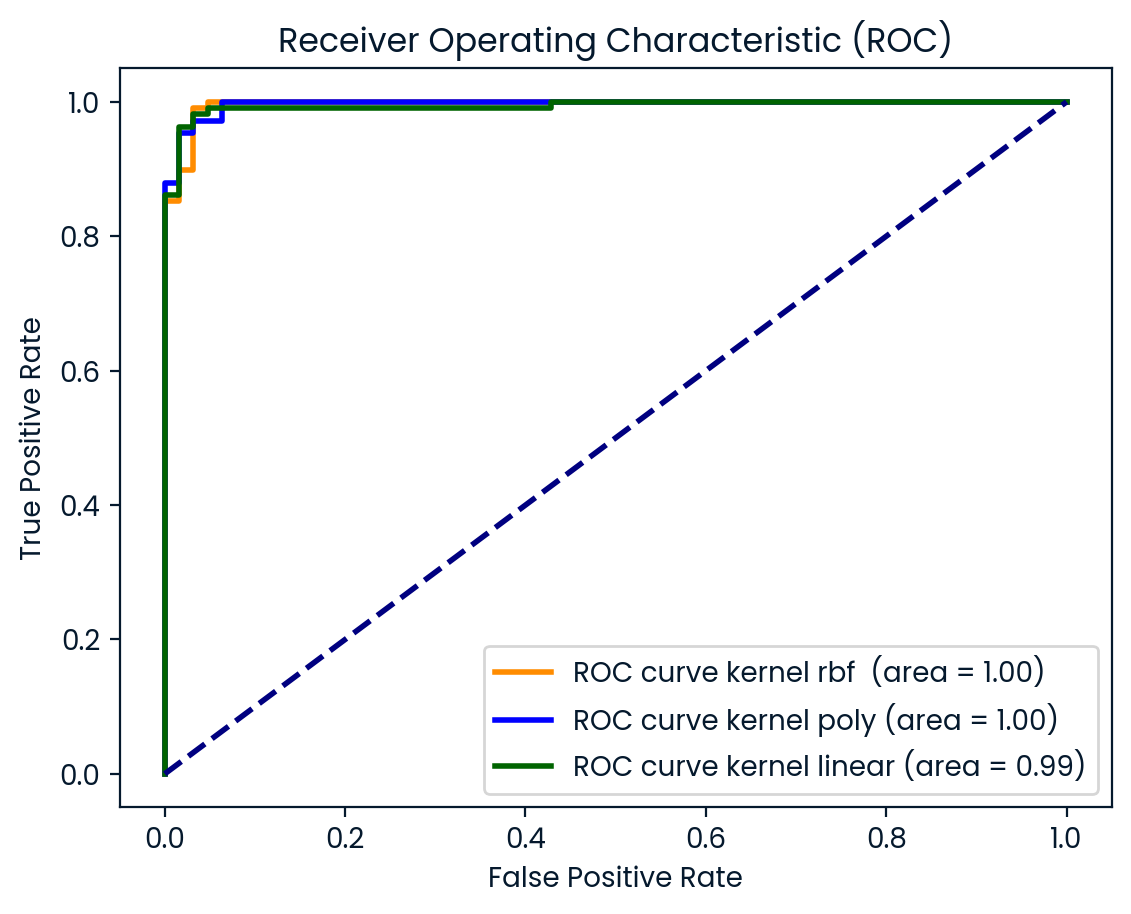

In [30]:
# Análise gráfica
# Gráfico
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC curve kernel rbf  (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'ROC curve kernel poly (area = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='darkgreen', lw=2, label=f'ROC curve kernel linear (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Variando calores de C

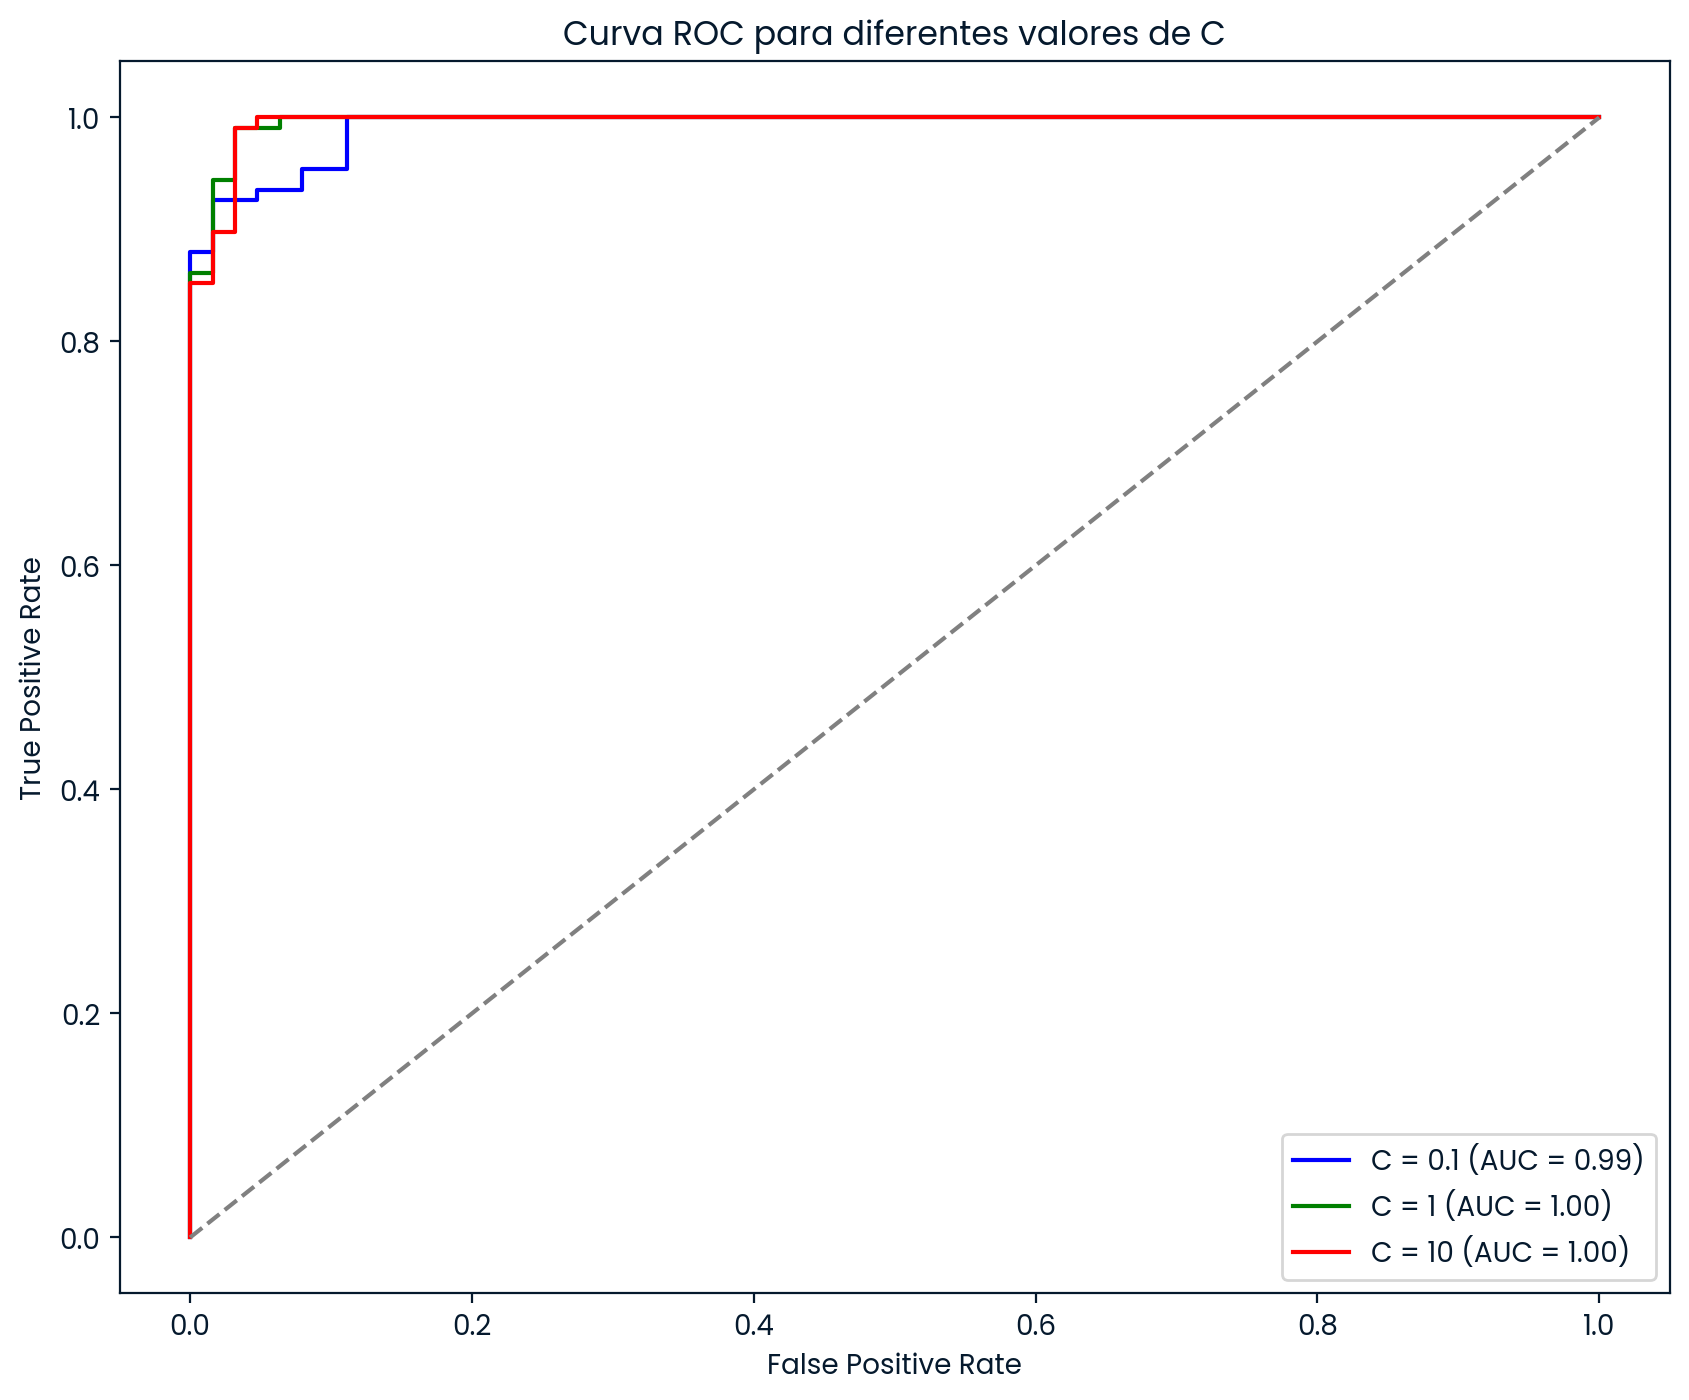

In [38]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Carregar os dados de câncer
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Valores diferentes de C para simulação
C_values = [0.1, 1, 10]
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 8))

for i, C in enumerate(C_values):
    # Inicializar e treinar o modelo SVM
    svm_model = SVC(kernel='rbf', C=C, gamma='scale', probability=True)
    svm_model.fit(X_train, y_train)
    
    # Prever probabilidades
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    
    # Calcular a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotar a curva ROC
    plt.plot(fpr, tpr, color=colors[i], label=f'C = {C} (AUC = {roc_auc:.2f})')

# Plotar a linha de referência
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adicionar títulos e legendas
plt.title('Curva ROC para diferentes valores de C')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### Exercício - Teste os seguintes valores para o parâmetro gamma: 0.1 e 0.01

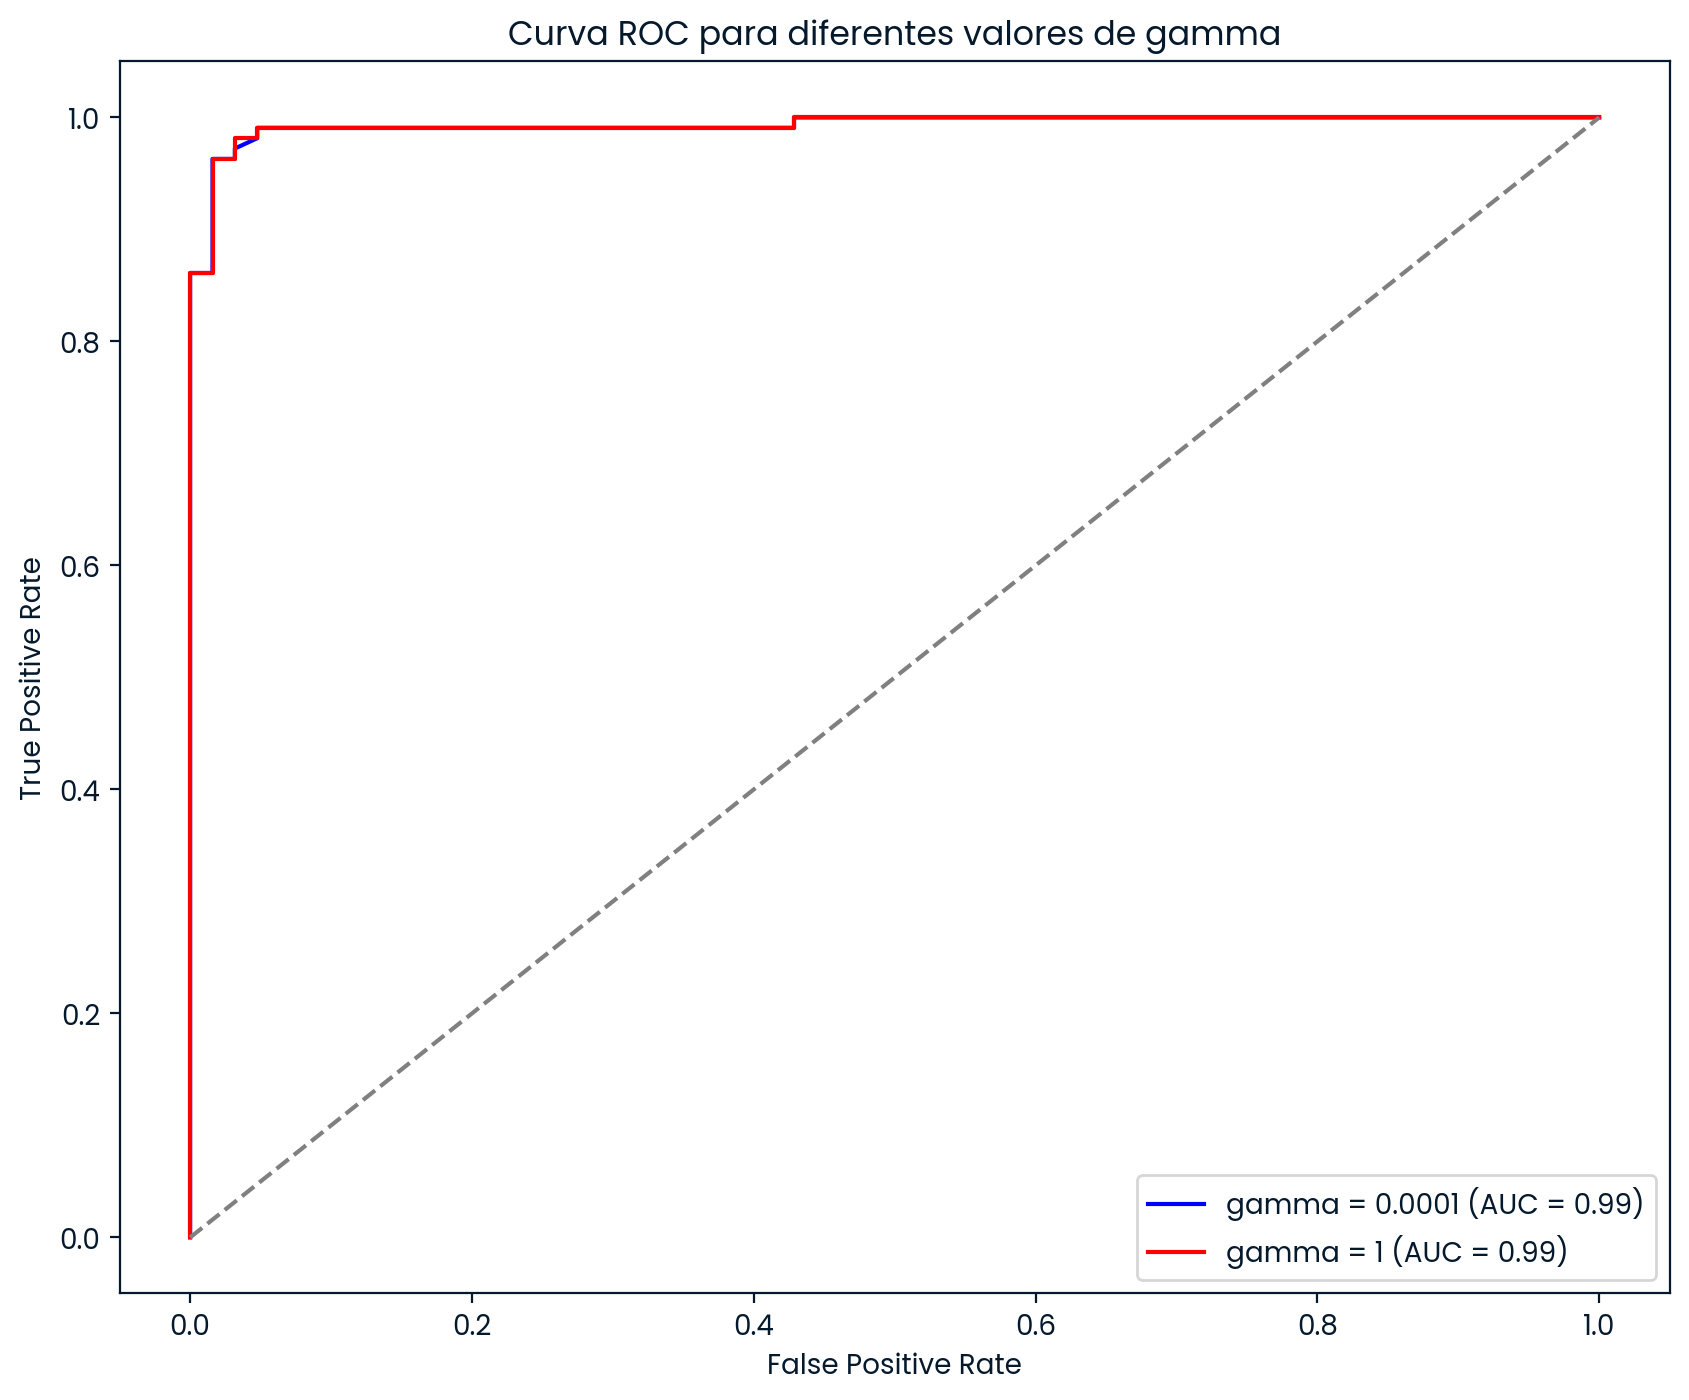

In [42]:
# Valores diferentes de C para simulação
gamma_values = [0.0001, 1]
colors = ['blue', 'red']

plt.figure(figsize=(10, 8))

for i, gamma in enumerate(gamma_values):
    # Inicializar e treinar o modelo SVM
    svm_model = SVC(kernel='linear', C=10, gamma='scale', probability=True)
    svm_model.fit(X_train, y_train)
    
    # Prever probabilidades
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    
    # Calcular a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotar a curva ROC
    plt.plot(fpr, tpr, color=colors[i], label=f'gamma = {gamma} (AUC = {roc_auc:.2f})')

# Plotar a linha de referência
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adicionar títulos e legendas
plt.title('Curva ROC para diferentes valores de gamma')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()